In [1]:
import numpy as np
from src.utils.utils import *
from src.utils import plot_config
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 120

/opt/anaconda3/envs/dpmol/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


---
# 100 spin
---

100


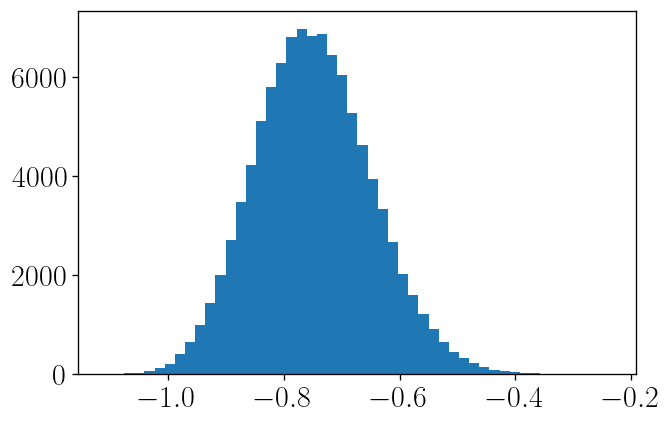

In [2]:
ssf_beta05 = np.load("data/montecarlo-samples/ssf/100spins-seed42-sample102000-sweeps100-beta0.5.npy")
neigh, coup, len_neigh = get_couplings(10, "data/couplings/100.txt")
print(ssf_beta05.shape[1])
ssf_beta05_engs = []
for sample in ssf_beta05:
    ssf_beta05_engs.append(compute_energy(sample, neigh, coup, len_neigh)/ssf_beta05.shape[1])
ssf_beta05_engs = np.asarray(ssf_beta05_engs)
plt.hist(ssf_beta05_engs, bins=50)
# plt.yscale("log")
plt.show()

In [33]:
ssf_beta05_engs = ssf_beta05_engs[:, np.newaxis]
ssf_beta05 = ssf_beta05.reshape(-1, 100)


In [34]:
ssf_beta05_dataset = np.hstack((ssf_beta05_engs, ssf_beta05))


In [35]:
np.random.shuffle(ssf_beta05_dataset)

ssf_beta05_train = ssf_beta05_dataset[:81000]
ssf_beta05_val = ssf_beta05_dataset[81000:]


In [36]:
# np.save("data/montecarlo-samples/ssf/datasets/100spins-seed42-sample102000-sweeps100-beta0.5-train.npy", ssf_beta05_train)
# np.save("data/montecarlo-samples/ssf/datasets/100spins-seed42-sample102000-sweeps100-beta0.5-val.npy", ssf_beta05_val)

In [37]:
print(ssf_beta05_engs.mean())

-0.7484879032776592


In [38]:
samples_mean = np.load("sample-100000_size-101_2023-11-06_10-46-04.npz")
samples_mean = samples_mean["sample"]
engs_mean = []
for sample in samples_mean:
    engs_mean.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))

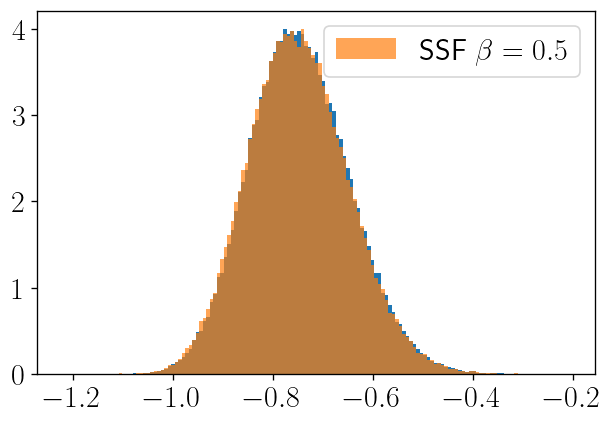

In [39]:
bins = np.arange(-1.22, -0.2, 0.007)
plt.hist(engs_mean, bins=bins, density=True)
plt.hist(ssf_beta05_engs, bins=bins, alpha=0.7, label=r"SSF $\beta=0.5$", density=True)
# plt.vlines(-1.0, 0, 5, linestyles="--", colors="b", label=r"$E_{cond}=-1.0$")
plt.legend()
plt.show()

In [40]:
print(np.mean(ssf_beta05_engs))
print(np.mean(engs_mean))

-0.7484879032776592
-0.7457356165034823


---
# 484 spin
---

In [1]:
import numpy as np
from src.utils.utils import *
from src.utils import plot_config
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 120

/opt/anaconda3/envs/dpmol/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [3]:
train, val = conditional_dataset("data/montecarlo-samples/ssf/484spins-seed42-sample201000-sweeps10-beta0.5.npy", 484, "data/couplings/484-z4.txt", 80, False, )

In [5]:
ssf_beta05_484 = np.load("data/montecarlo-samples/ssf/484spins-seed42-sample201000-sweeps10-beta0.5.npy")
neigh, coup, len_neigh = get_couplings(22, "data/couplings/484-z4.txt")
print(ssf_beta05_484.shape[1])
ssf_beta05_484_engs = []
for sample in ssf_beta05_484:
    ssf_beta05_484_engs.append(compute_energy(sample, neigh, coup, len_neigh)/ssf_beta05_484.shape[1])
ssf_beta05_484_engs = np.asarray(ssf_beta05_484_engs)

# eng = np.load("sample-100000_size-485_2023-11-06_484-spins-SSF-beta0.5.npz")
# eng = eng["sample"]
# engs_mean = []
# for sample in eng:
#     engs_mean.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))

484


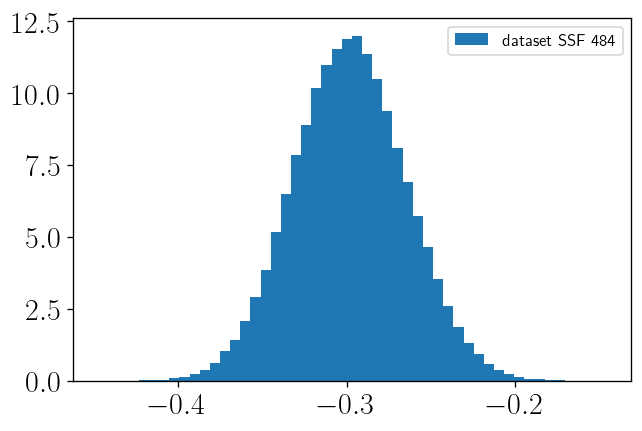

In [6]:
plt.hist(ssf_beta05_484_engs, label="dataset SSF 484", bins=50, density=True)
# plt.hist(engs_mean, label="CondMADE", bins=50, density=True)
plt.legend(fontsize=10)
plt.show()

In [7]:
np.mean(ssf_beta05_484_engs)

-0.29796726233564585